In [2]:
import torch
from torch.utils.data import Dataset,DataLoader,RandomSampler,SequentialSampler,BatchSampler,default_collate
import matplotlib.pyplot as plt
import cv2
import os

In [7]:


class CustomDataset(Dataset):
    def __init__(self,dir,class_name):
        self.dir=dir
        self.class_name=class_name
        self.root_path=os.path.join(self.dir,self.class_name)
        # print(self.root_path)
        self.elements=os.listdir(self.root_path)
        # print(self.elements)
        self.img_list=[]
        
        print(len(self.img_list))
    
    def __getitem__(self,index):
        image=self.elements[index]
        # print(self.elements[index])
        img_path=os.path.join(self.root_path,image)
        self.img=plt.imread(img_path)
        self.img_list.append(self.img)
        return self.img
    
    def max_width_height(self):
        self.shape_list=[]
        for i in range(len(self.img_list)):
            self.shape_list.append(list(self.img_list[i].shape))
        self.max_height=max(list(zip(*self.shape_list))[0])
        self.max_width=max(list(zip(*self.shape_list))[1])
        return(self.max_height,self.max_width)
     
    def padded_img(self):
        self.max_width_height()
        count=0
        # print(len(self.img_list))
        color= [255,205,0]
        print(count)
        for i in range(len(self.img_list)):

            img=self.img_list[i]
            # print(img.shape)
            height=self.max_height-img.shape[0]
            # print(height)
            width=self.max_width-img.shape[1]
            # print(width)
            self.img_list[i]= cv2.copyMakeBorder(self.img_list[i].copy(),0,height,0,width,cv2.BORDER_CONSTANT,value=color)
        return self.img_list

    def __len__(self):
        return len(self.elements)





In [9]:
dir="Data/"
class_name="aeroplane"
custom_dataset=CustomDataset(dir,class_name)

0


(296, 408, 3)
(297, 397, 3)
(297, 354, 3)
(297, 445, 3)
(297, 470, 3)
(266, 452, 3)
(323, 474, 3)
(297, 404, 3)
(267, 430, 3)
(297, 399, 3)


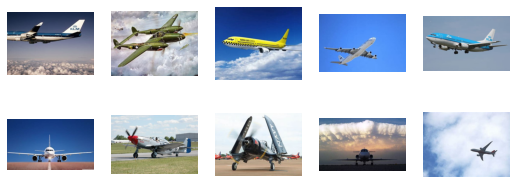

In [17]:
len(custom_dataset)
img_list=[]
fig=plt.figure(figsize=(9,9))
shape_list=[]
for i in range(len(custom_dataset)):
    img=custom_dataset[i]
    img_list.append(img)
    print(img.shape)
    fig.add_subplot(5,5,i+1)    
    plt.imshow(img,cmap='gray')
    shape_list.append(list(img.shape))
    plt.axis("off")
# img=custom_dataset.padded_img()

0


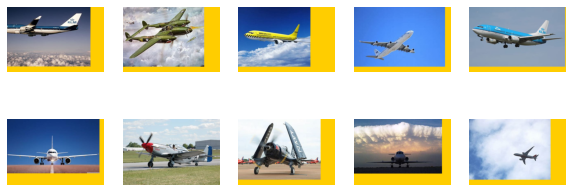

In [11]:

fig=plt.figure(figsize=(10,10))

img=custom_dataset.padded_img()

for i in range(len(img)):
    padded_img=img[i]
    
    fig.add_subplot(5,5,i+1) 
    
    plt.imshow(padded_img,cmap='gray')
    plt.axis("off")   
    # print(padded_img.shape)
    # plt.imshow(padded_img,cmap='gray')

In [80]:
import os

data="aeroplane"
os.path.join("Data",data)


class CustomDataset(Dataset):
    def __init__(self,dir,class_name):
        self.dir=dir
        self.class_name=class_name
        self.root_path=os.path.join(self.dir,self.class_name)
        # print(self.root_path)
        self.elements=os.listdir(self.root_path)
        # print(self.elements)

    def __len__(self):
        return len(self.elements)
    def __getitem__(self,index):
        image=self.elements[index]
        # print(self.elements[index])
        img_path=os.path.join(self.root_path,image)
        img=plt.imread(img_path)
        return img

In [81]:
dir="Data/"
class_name="dog"
custom_dataset=CustomDataset(dir,class_name)

In [82]:
def Own_collate_func(batch):
    collated_list=[]
    shape_list=[]
    print(len(batch))

    for i in range(len(batch)):
        shape_list.append(list(batch[i].shape))
    max_height=max(list(zip(*shape_list))[0])
    max_width=max(list(zip(*shape_list))[1])
    print(max_height,max_width)
    print(shape_list)

        # print(len(batch))
    color= [255,205,0]
    for i in range(len(batch)):
        img=batch[i]
        # print(img.shape)
        height=max_height-img.shape[0]
        # print(height)
        width=max_width-img.shape[1]
        # print(width)
        batch[i]= cv2.copyMakeBorder(batch[i].copy(),0,height,0,width,cv2.BORDER_CONSTANT,value=color)
        collated_list.append(batch[i])
    
    return [collated_list,shape_list]
    
dataloader=DataLoader(custom_dataset,batch_size=4,collate_fn=Own_collate_func,drop_last=True)

    # print(i)

4
310 460
[[310, 232, 3], [297, 435, 3], [306, 460, 3], [297, 356, 3]]
4
297 383
[[257, 383, 3], [265, 383, 3], [297, 359, 3], [297, 273, 3]]
4
318 463
[[318, 450, 3], [297, 396, 3], [297, 377, 3], [310, 463, 3]]
4
297 426
[[296, 398, 3], [297, 234, 3], [269, 426, 3], [297, 288, 3]]
4
315 414
[[297, 206, 3], [297, 374, 3], [266, 414, 3], [315, 235, 3]]
4
310 465
[[298, 224, 3], [310, 465, 3], [310, 234, 3], [310, 460, 3]]
4
306 474
[[297, 438, 3], [296, 474, 3], [306, 410, 3], [306, 463, 3]]


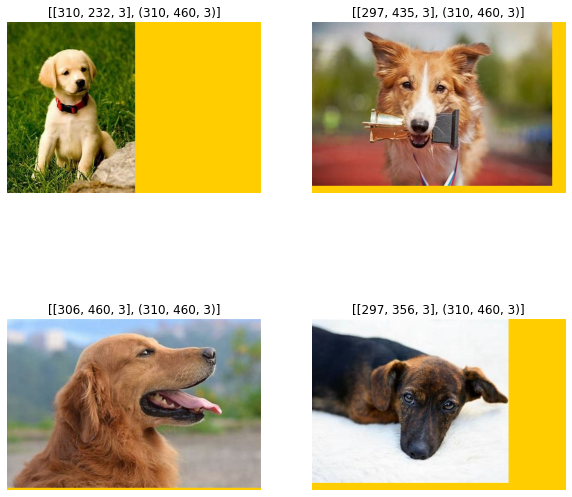

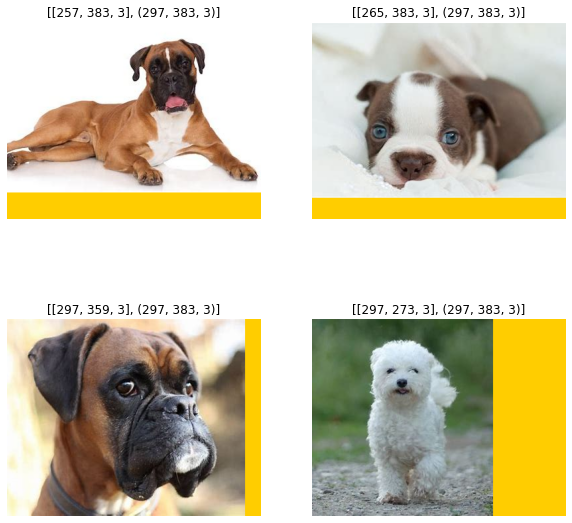

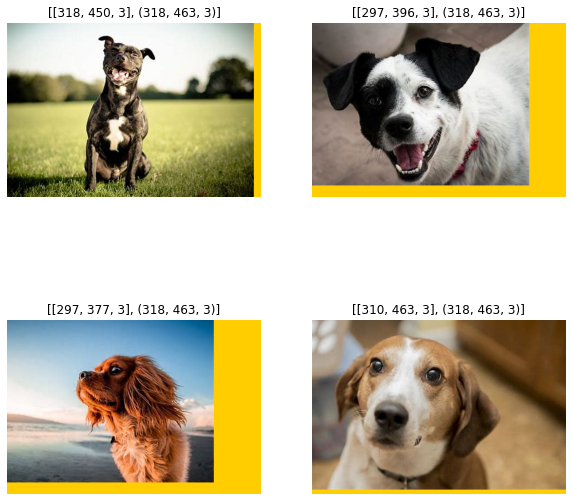

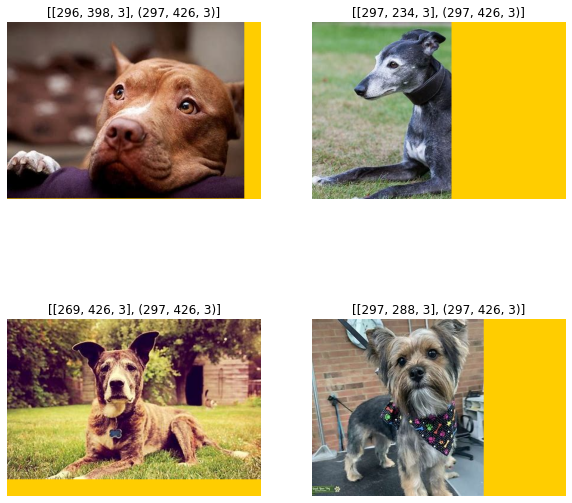

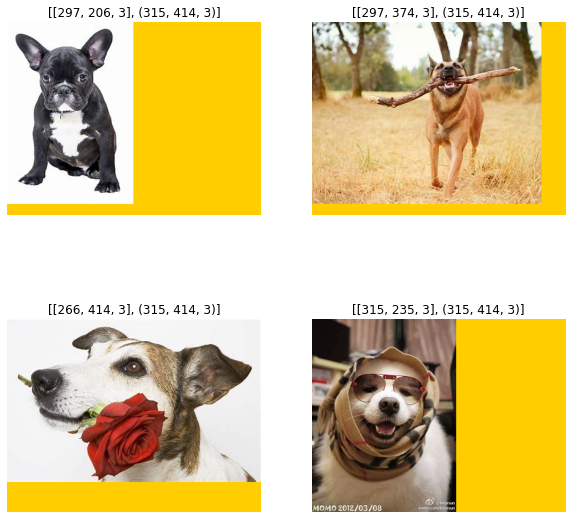

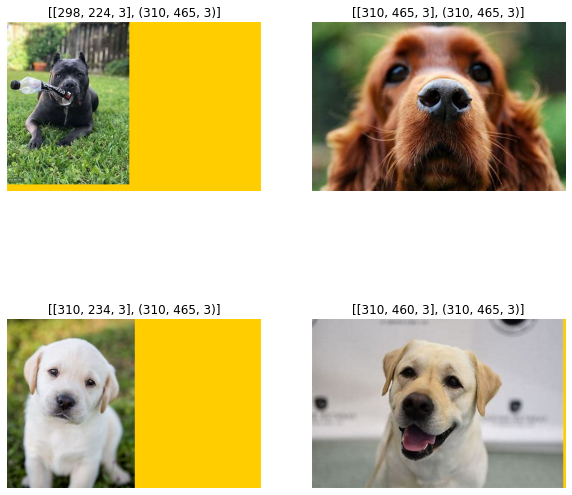

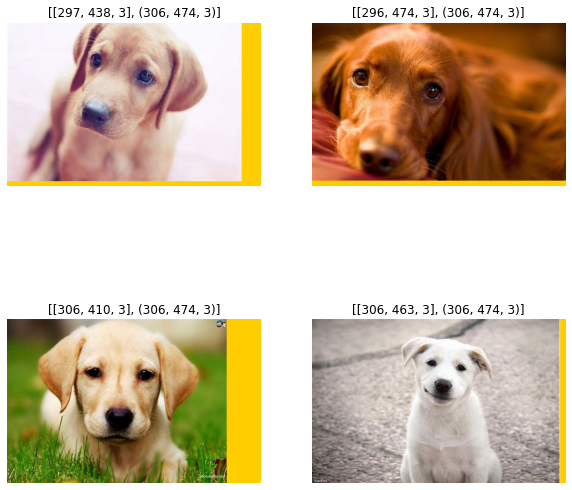

In [83]:


for i in dataloader:
    fig=plt.figure(figsize=(10,10))
    for j in range(len(i[0])):
        padded_img=i[0][j]
    
        fig.add_subplot(2,2,j+1) 
        plt.imshow(padded_img,cmap='gray')
        plt.title([i[1][j],i[0][j].shape])
        plt.axis("off") 